In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf

In [2]:
df=pd.read_csv("website_classification.csv")
df.sample(7)

,Unnamed: 0,website_url,cleaned_website_text,Category
536,536,https://warritatafo.com/,warritatafo news entertainment guru africa num...,News
782,782,http://www.boardgamegeek.com/game/5120,doubles wild board game boardgamegeek box roll...,Games
615,615,https://www.asis.gov.au,australian secret intelligence service home au...,Law and Government
135,135,https://www.iflix.com,watch download films live streaming tv indomov...,Streaming Services
304,304,https://www.transfermarkt.com/,football transfer rumour market value news tra...,Sports
1264,1264,http://site.icu-project.org/,icu international components unicode icu proje...,Computers and Technology
300,300,https://crickettimes.com/,latest cricket news updates latest cricket new...,Sports


In [3]:
df.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [4]:
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df['Category'].value_counts()

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: Category, dtype: int64

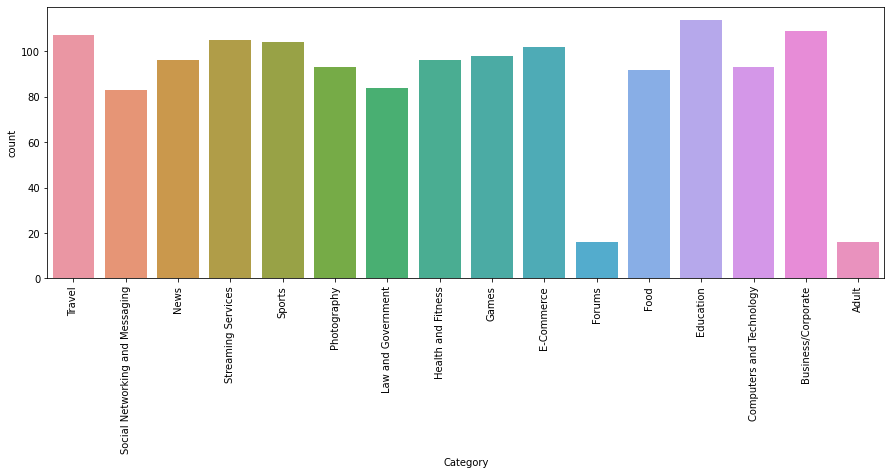

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90);

In [8]:
x=df["cleaned_website_text"]
y=df["Category"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
vect=CountVectorizer(lowercase=True,stop_words='english')
x_yeni=vect.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [13]:
print(x_yeni)

  (0, 37680)	1
  (0, 48797)	4
  (0, 21762)	3
  (0, 24436)	8
  (0, 1050)	4
  (0, 6308)	1
  (0, 46701)	2
  (0, 14350)	9
  (0, 58620)	1
  (0, 7842)	2
  (0, 44922)	10
  (0, 22378)	1
  (0, 41934)	1
  (0, 7957)	2
  (0, 30951)	1
  (0, 24441)	4
  (0, 49800)	2
  (0, 37668)	3
  (0, 38735)	1
  (0, 57843)	1
  (0, 7558)	2
  (0, 10547)	2
  (0, 13675)	9
  (0, 9868)	1
  (0, 15049)	1
  :	:
  (1407, 51819)	1
  (1407, 54302)	1
  (1407, 28775)	1
  (1407, 39856)	1
  (1407, 8007)	1
  (1407, 46791)	1
  (1407, 49479)	1
  (1407, 49984)	2
  (1407, 36789)	1
  (1407, 21364)	1
  (1407, 52157)	1
  (1407, 55717)	1
  (1407, 30145)	1
  (1407, 33216)	1
  (1407, 10939)	1
  (1407, 10771)	1
  (1407, 38497)	1
  (1407, 27357)	1
  (1407, 31195)	1
  (1407, 53684)	1
  (1407, 30386)	1
  (1407, 17642)	1
  (1407, 27616)	1
  (1407, 4618)	1
  (1407, 51471)	1


In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
mb=MultinomialNB()

In [16]:
mb.fit(x_train,y_train)

MultinomialNB()

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
tahmin=mb.predict(x_test)

In [19]:
accuracy_score(y_test,tahmin)

0.875